In [6]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
import datetime as dt

In [7]:
trips_all=pd.read_csv("trip.csv")
trips=trips_all.loc[trips_all.start_date.str.contains('4/'+'\S'+'/2014')]
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
283460,243090,186,4/9/2014 23:33,Commercial at Montgomery,45,4/9/2014 23:36,Market at Sansome,77,397,Subscriber,94112
283461,243089,184,4/9/2014 23:32,Redwood City Caltrain Station,22,4/9/2014 23:35,Mezes Park,83,216,Subscriber,94063
283462,243088,765,4/9/2014 23:31,Embarcadero at Sansome,60,4/9/2014 23:43,Market at 4th,76,267,Subscriber,94108
283463,243087,1006,4/9/2014 23:29,San Francisco Caltrain (Townsend at 4th),70,4/9/2014 23:46,San Francisco Caltrain (Townsend at 4th),70,512,Customer,94127
283464,243086,328,4/9/2014 23:21,Steuart at Market,74,4/9/2014 23:26,Davis at Jackson,42,620,Subscriber,94111


In [8]:
trips['start_date'] = pd.to_datetime((trips['start_date']))
trips['dayofweek'] = trips.start_date.dt.dayofweek #nro 5 es sabado, 6 es domingo
trips.head()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,dayofweek
283460,243090,186,2014-04-09 23:33:00,Commercial at Montgomery,45,4/9/2014 23:36,Market at Sansome,77,397,Subscriber,94112,2
283461,243089,184,2014-04-09 23:32:00,Redwood City Caltrain Station,22,4/9/2014 23:35,Mezes Park,83,216,Subscriber,94063,2
283462,243088,765,2014-04-09 23:31:00,Embarcadero at Sansome,60,4/9/2014 23:43,Market at 4th,76,267,Subscriber,94108,2
283463,243087,1006,2014-04-09 23:29:00,San Francisco Caltrain (Townsend at 4th),70,4/9/2014 23:46,San Francisco Caltrain (Townsend at 4th),70,512,Customer,94127,2
283464,243086,328,2014-04-09 23:21:00,Steuart at Market,74,4/9/2014 23:26,Davis at Jackson,42,620,Subscriber,94111,2


In [9]:
viajes_total=trips['id'].count()

trips_lunes= trips[(trips['dayofweek']==0)]['id'].count()
trips_martes= trips[(trips['dayofweek']==1)]['id'].count()
trips_miercoles= trips[(trips['dayofweek']==2)]['id'].count()
trips_jueves= trips[(trips['dayofweek']==3)]['id'].count()
trips_viernes= trips[(trips['dayofweek']==4)]['id'].count()
trips_sabado= trips[(trips['dayofweek']==5)]['id'].count()
trips_domingo= trips[(trips['dayofweek']==6)]['id'].count()

In [10]:
#porcentajes
porcentaje_lunes = trips_lunes*100/viajes_total
porcentaje_martes = trips_martes*100/viajes_total
porcentaje_miercoles = trips_miercoles*100/viajes_total
porcentaje_jueves = trips_jueves*100/viajes_total
porcentaje_viernes = trips_viernes*100/viajes_total
porcentaje_sabado = trips_sabado*100/viajes_total
porcentaje_domingo = trips_domingo*100/viajes_total



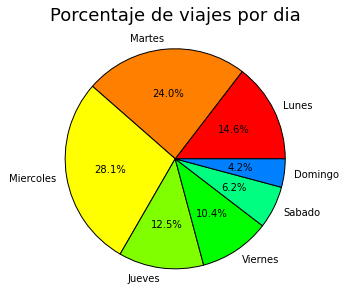

In [52]:
%matplotlib inline
viajes = [porcentaje_lunes,porcentaje_martes,porcentaje_miercoles,porcentaje_jueves,porcentaje_viernes,porcentaje_sabado,porcentaje_domingo] # Definimos un vector con el % de visitas del top ten de países
#visitas = np.append(visitas, 100. - np.sum(visitas)) # Introducimos un último elemento que recoge el % de visitas de otros países fuera del top ten
dias = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']  # Etiquetas para los quesitos
#explode = [0, 0, 0, 0, 0, 0, 0, 0.2, 0.2, 0, 0]  # Esto nos ayudará a destacar algunos quesitos
n=len(dias)
plot.pie(viajes, labels = dias,autopct='%1.1f%%', colors=['#FF0000', '#FF8000','#FFFF00','#80FF00','#00FF00','#00FF80','#0080FF'])  # Dibuja un gráfico de quesitos
#plot.pie(viajes, labels = dias,autopct='%1.1f%%',colors = ['%f' % (i/float(n)) for i in range(n)])
plot.title('Porcentaje de viajes por dia\n', fontsize = 18)
plot.axis('equal')
plot.show()